# Installation

In [1]:
!pip install -q -r requirements.txt
!pip install -q pandas 
!pip install -q matplotlib

You should consider upgrading via the 'C:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'C:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'C:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


# Load packages

In [2]:
import pandas as pd
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell

## Set settings

In [3]:
# Pandas settings
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

plt.style.use('ggplot')

# Load data

In [4]:
root = Path('data')
df_listings = pd.read_csv(root / 'listings.csv')
df_calendar = pd.read_csv(root / 'calendar.csv')

# Business Understanding
## Background
Amsterdam is one of the most popular tourist destinations in Europe.
It is know worldwide by it’s artistic heritage, extensive canal network and narrow gabled houses, a legacy of the Golden Age.
It’s also a perfect destination for a romantic long weekend.
The cobbled streets and narrow alleys are perfect for strolling around and are also home to countless spots to wine and dine.

Because Amsterdam is a very popular tourist destination there is a high demand of rooms and thats why I chose the Airbnb case and Amsterdam.

### Question 1:
What type of objects are listed on Airbnb?
### Question 2:
What is the average price of a listing?
### Question 3:
what is the distribution of prices?
### Question 4:
when is the average price the higest and lowest?

# Data Understanding:

## First look at the listings dataset.

In [5]:
print('The listings dataset has {_rows} rows, and {_columns} columns'.format(_rows=df_listings.shape[0], _columns=df_listings.shape[1]))
print('The listings dataset has a total of {_missing} missing values'.format(_missing=df_listings.isnull().sum(axis = 0).sum()))
print('There are missing values are in the column\'s {_columns}'.format(_columns=list(df_listings.columns[df_listings.isnull().any()])))

The listings dataset has 16478 rows, and 74 columns
The listings dataset has a total of 146338 missing values
There are missing values are in the column's ['name', 'description', 'neighborhood_overview', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_group_cleansed', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_

## So there are missing values in the listings dataset. do I need to clean the dataset to awnser the first question?

In [6]:
print('There are {_listings} AirBNB listings in Amsterdam.'.format(_listings=df_listings.shape[0]))
print('There are {_values} NaN values in the column room_type.'.format(_values=df_listings['room_type'].isnull().sum()))

There are 16478 AirBNB listings in Amsterdam.
There are 0 NaN values in the column room_type.


## To awnser question 1 there is no cleaning necessary.

## Question 1: What type of objects are listed on Airbnb? 

In [7]:
### Analyse
df_room_types = pd.DataFrame(df_listings.groupby(['room_type'])['id'].count())

Total_listings = int(df_listings.shape[0])

percentage = []
for index, qty in df_room_types.iterrows():
    pct = (qty.values/Total_listings) * 100
    percentage.append(pct)
df_room_types['pct'] = percentage

df_room_types['pct'] = df_room_types['pct'].astype(float).round(decimals=2)

df_room_types


,id,pct
room_type,,
Entire home/apt,12829,77.86
Hotel room,110,0.67
Private room,3495,21.21
Shared room,44,0.27


<BarContainer object of 4 artists>

Text(0.5, 1.0, 'What type of objects are listed on Airbnb?')

Text(0, 0.5, 'Room_type')

Text(0.5, 0, 'Qty')

<function matplotlib.pyplot.show(close=None, block=None)>

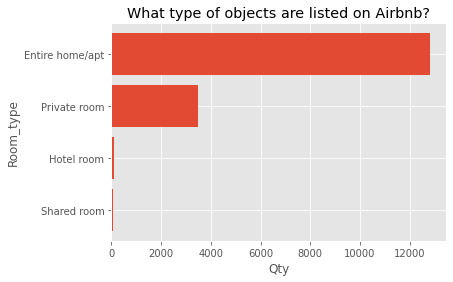

In [8]:
### Visualise, show the results in a graph
differten_room_types = df_listings['room_type'].value_counts().sort_values()
room_types = differten_room_types.index
qty_room_types = list(differten_room_types.values)
plt.barh(room_types, qty_room_types)
plt.title('What type of objects are listed on Airbnb?')
plt.ylabel('Room_type')
plt.xlabel('Qty')
plt.show

#### Explain:
Almost 78% of the listings in Amsterdam are “Entire home/apt”. followed by “Private room” with 21%. and arround 1% is “Hotel/shared rooms”.


## Question 2: What is the average price of a listing?

In [9]:
### Analyse
print('There are {_values} NaN values in the price column.'.format(_values=df_listings['price'].isnull().sum()))

There are 0 NaN values in the price column.


In [10]:
print('Do we need to clean the column?')
df_listings['price'].head(1)
print('We need to remove the dollar currency symbol and change the dtype to float befor I can calculate a value.')

Do we need to clean the column?


0    $59.00
Name: price, dtype: object

We need to remove the dollar currency symbol and change the dtype to float befor I can calculate a value.


In [11]:
def clean_currency_symbol(dataframe, column_name, symbol="$"):
    '''
    This function removes the currency symbol from the specified column_name in the specified dataframe.
    '''
    dataframe[column_name] = dataframe[column_name].str.replace(symbol, '', regex=True)


def make_numeric(dataframe, column_name):
    '''
    This function converts the specified column_name to numeric type.
    '''
    dataframe[column_name] = pd.to_numeric(dataframe[column_name], errors='coerce')


In [12]:
### prepare
clean_currency_symbol(df_listings, 'price')
make_numeric(df_listings, 'price')

In [13]:
print('The average price of a Airbnb listing in Amsterdam is {_mean_price} dolar.'.format(_mean_price=df_listings['price'].mean().round(0)))

The average price of a Airbnb listing in Amsterdam is 152.0 dolar.


In [14]:
### Visualise
df_price_room_types = pd.DataFrame(df_listings.groupby(['room_type'])['price'].mean())
df_price_room_types['price'] = df_price_room_types['price'].round(decimals=0)
df_price_room_types

,price
room_type,
Entire home/apt,167.0
Hotel room,119.0
Private room,100.0
Shared room,81.0


In [15]:
### Explain
print('On average:')
print('a "Entire home/apt" is the most expensive room type.')
print('a "shared room" is the most cheapest room type.')

On average:
a "Entire home/apt" is the most expensive room type.
a "shared room" is the most cheapest room type.


## Question 3: what is the distribution of prices?

(array([4.630e+02, 4.073e+03, 5.356e+03, 3.242e+03, 1.431e+03, 8.300e+02,
        3.790e+02, 2.450e+02, 1.240e+02, 8.600e+01, 7.300e+01, 4.200e+01,
        2.000e+01, 1.100e+01, 1.400e+01, 1.500e+01, 1.500e+01, 3.000e+00,
        8.000e+00, 1.000e+01]),
 array([  0.  ,  49.95,  99.9 , 149.85, 199.8 , 249.75, 299.7 , 349.65,
        399.6 , 449.55, 499.5 , 549.45, 599.4 , 649.35, 699.3 , 749.25,
        799.2 , 849.15, 899.1 , 949.05, 999.  ]),
 <BarContainer object of 20 artists>)

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histogram: Price distribution')

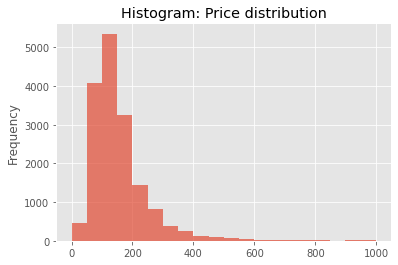

In [16]:
    ### Analyse and Visualise
    price_dist = df_listings['price']
    plt.hist(x=price_dist, bins=20, alpha=0.7, rwidth=1)
    plt.ylabel('Frequency')
    plt.title('Histogram: Price distribution')
    plt.show()

In [17]:
### Explain
print('The histogram shows that the majority of all listings are priced below $200 per day.')

The histogram shows that the majority of all listings are priced below $200 per day.


(array([6.220e+02, 1.861e+03, 6.500e+02, 2.070e+02, 7.100e+01, 3.000e+01,
        1.400e+01, 5.000e+00, 7.000e+00, 8.000e+00, 3.000e+00, 3.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 4.000e+00]),
 array([  9. ,  58.5, 108. , 157.5, 207. , 256.5, 306. , 355.5, 405. ,
        454.5, 504. , 553.5, 603. , 652.5, 702. , 751.5, 801. , 850.5,
        900. , 949.5, 999. ]),
 <BarContainer object of 20 artists>)

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histogram: Price distribution of a Private room')

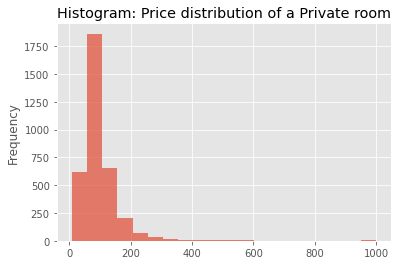

(array([1.210e+02, 2.743e+03, 4.726e+03, 2.599e+03, 1.205e+03, 5.900e+02,
        2.930e+02, 2.030e+02, 8.200e+01, 9.200e+01, 3.200e+01, 4.100e+01,
        6.000e+00, 1.100e+01, 1.700e+01, 7.000e+00, 1.300e+01, 2.000e+00,
        7.000e+00, 6.000e+00]),
 array([  4.  ,  53.75, 103.5 , 153.25, 203.  , 252.75, 302.5 , 352.25,
        402.  , 451.75, 501.5 , 551.25, 601.  , 650.75, 700.5 , 750.25,
        800.  , 849.75, 899.5 , 949.25, 999.  ]),
 <BarContainer object of 20 artists>)

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histogram: Price distribution of a Entire home/apt')

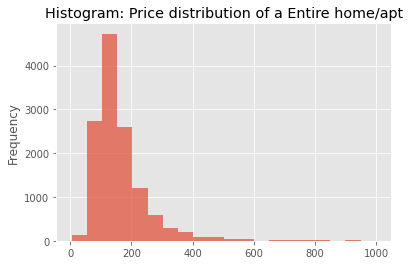

(array([29., 19., 27., 18.,  4.,  3.,  7.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([  0.,  45.,  90., 135., 180., 225., 270., 315., 360., 405., 450.,
        495., 540., 585., 630., 675., 720., 765., 810., 855., 900.]),
 <BarContainer object of 20 artists>)

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histogram: Price distribution of a Hotel room')

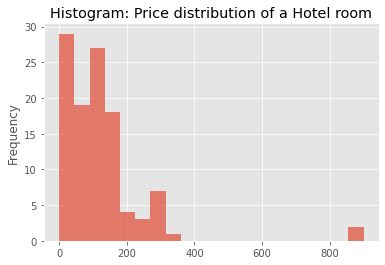

(array([13., 14.,  8.,  2.,  1.,  1.,  2.,  0.,  2.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 17.  ,  41.15,  65.3 ,  89.45, 113.6 , 137.75, 161.9 , 186.05,
        210.2 , 234.35, 258.5 , 282.65, 306.8 , 330.95, 355.1 , 379.25,
        403.4 , 427.55, 451.7 , 475.85, 500.  ]),
 <BarContainer object of 20 artists>)

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histogram: Price distribution of a Shared room')

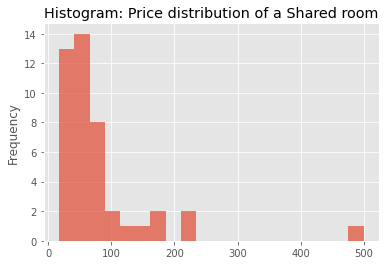

In [18]:
### Analyse and visualise, Create a histogram for each room_type.
for room in df_listings['room_type'].unique():
    df_hist = df_listings[df_listings['room_type'] == room]

    price_dist = df_hist['price']

    plt.hist(x=price_dist, bins=20, alpha=0.7, rwidth=1)
    plt.ylabel('Frequency')
    plt.title('Histogram: Price distribution of a {_room}'.format(_room=room))


    plt.show()

In [19]:
### Explain
print('The majority of "privat room" listings are priced below $200 per day.')
print('The majority of "Entire home/apt" listings are priced below $200 per day.')
print('The majority of "Hotel room" listings are priced below $200 per day.')
print('The majority of "Shared room" listings are priced below $100 per day.')

The majority of "privat room" listings are priced below $200 per day.
The majority of "Entire home/apt" listings are priced below $200 per day.
The majority of "Hotel room" listings are priced below $200 per day.
The majority of "Shared room" listings are priced below $100 per day.


## Question 4: when is the average price the higest and lowest?

In [20]:
df_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,247805,2021-08-07,t,$129.00,$129.00,2.0,365.0
1,496953,2021-08-07,f,$150.00,$150.00,1.0,31.0
2,496953,2021-08-08,t,$174.00,$174.00,1.0,31.0
3,496953,2021-08-09,t,$174.00,$174.00,1.0,31.0
4,496953,2021-08-10,t,$174.00,$174.00,1.0,31.0


In [21]:
### Prepare data
clean_currency_symbol(df_calendar, 'price')
make_numeric(df_calendar, 'price')

In [22]:
df_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,247805,2021-08-07,t,129.0,$129.00,2.0,365.0
1,496953,2021-08-07,f,150.0,$150.00,1.0,31.0
2,496953,2021-08-08,t,174.0,$174.00,1.0,31.0
3,496953,2021-08-09,t,174.0,$174.00,1.0,31.0
4,496953,2021-08-10,t,174.0,$174.00,1.0,31.0


In [23]:
df_calender_avg_price = pd.DataFrame(df_calendar.groupby(['date'])['price'].mean())

Text(0.5, 1.0, 'The average price is growing')

Text(0.5, 0, 'days')

Text(0, 0.5, 'average price')

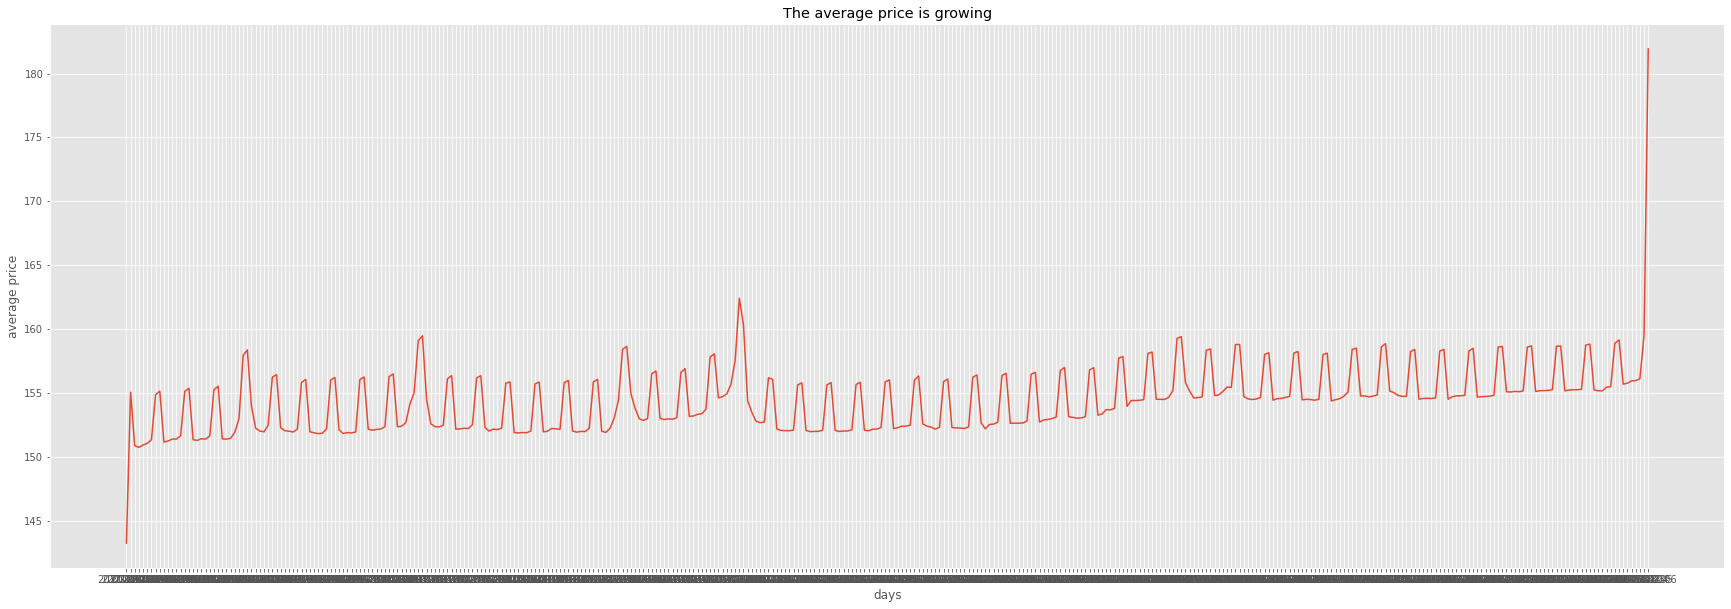

In [24]:
# Analyse and Visualise
plt.rcParams["figure.figsize"] = (30,10)
plt.plot(df_calender_avg_price)
plt.title('The average price is growing')
plt.xlabel('days')
plt.ylabel('average price')
plt.show()

## That is alot of data... Lets select every first day of the month to reduce the data.

In [25]:
# replace index with datetime
df_calender_avg_price['date'] = pd.to_datetime(df_calender_avg_price.index)
df_calender_avg_price.set_index('date', inplace=True)
# select first day of month
df_calender_avg_price = df_calender_avg_price[df_calender_avg_price.index.day == 1]


In [26]:
df_calender_avg_price

,price
date,
2021-09-01,151.947007
2021-10-01,156.065003
2021-11-01,152.032183
2021-12-01,153.057553
2022-01-01,160.348554
2022-02-01,152.173754
2022-03-01,152.551290
2022-04-01,157.746667
2022-05-01,154.734821


Text(0.5, 1.0, 'The average price is growing')

Text(0.5, 0, 'days')

Text(0, 0.5, 'average price')

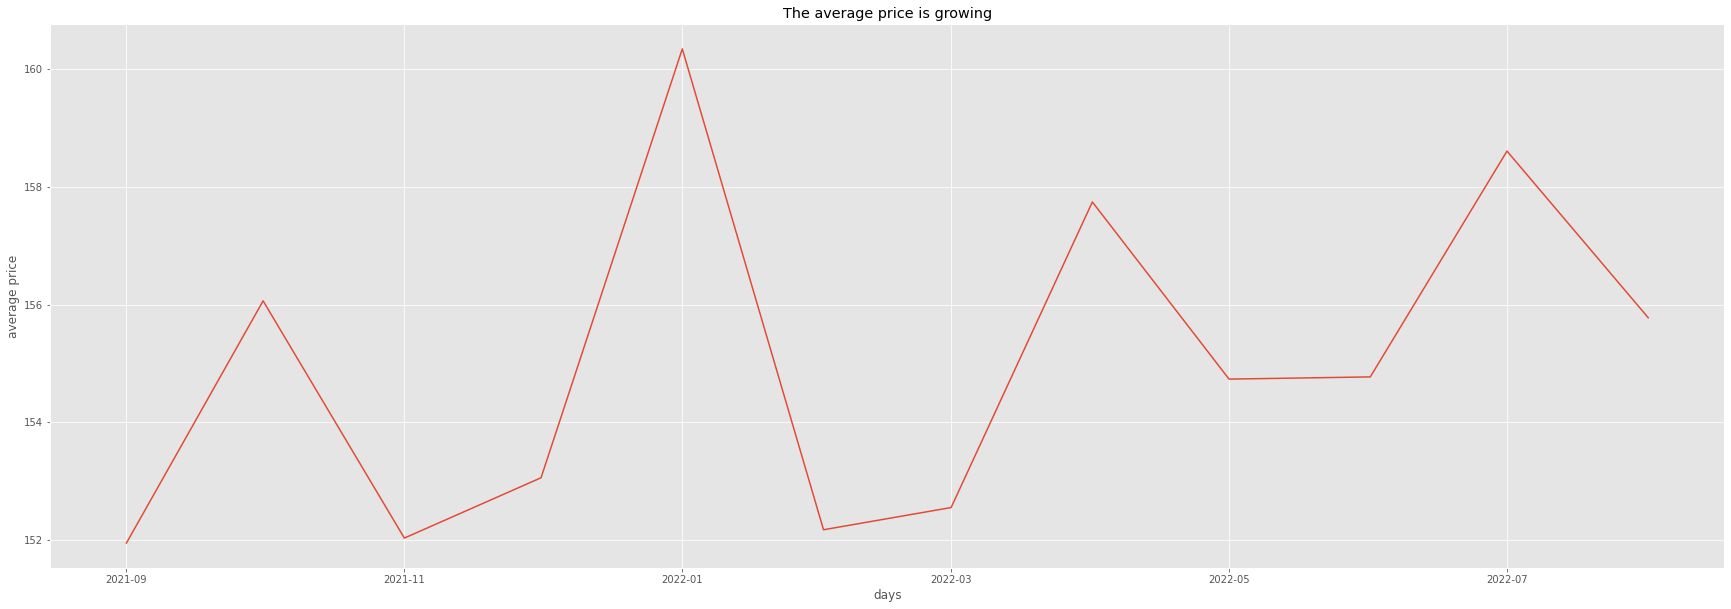

In [27]:
plt.rcParams["figure.figsize"] = (30,10)
plt.plot(df_calender_avg_price)
plt.title('The average price is growing')
plt.xlabel('days')
plt.ylabel('average price')
plt.show()

In [28]:
# Explain
print('The average price of a Airbnb room in september $152,- is rising to +$160,- in januari 2022')

The average price of a Airbnb room in september $152,- is rising to +$160,- in januari 2022
